In [1]:
import polars as pl
import numpy as np
from PIL import Image
from datasets import load_dataset

pl.Config.set_fmt_str_lengths(200)

/home/enric/projects/tiny_diffusion/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


polars.config.Config

In [2]:
PATH = '/mnt/sd1tb/'

# Method1 - Hugging Face Datasets Loader

In [17]:
dataset = load_dataset('poloclub/diffusiondb', '2m_random_1k', cache_dir=PATH + 'cache/', trust_remote_code=True)

Generating train split: 1000 examples [00:01, 698.00 examples/s]


In [14]:
ds_train.to_polars()[12]

image,prompt,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
struct[2],str,u32,u16,f32,str,u16,u16,str,"datetime[μs, UTC]",f32,f32
"{null,""/mnt/sd1tb/cache/downloads/extracted/46d1f1d35debf46bdf8683d93d6d2f9296d323c299cca84782022264830ae737/6a877b60-b3fd-4ed9-8d1a-39a09bdc2503.webp""}","""special forces nato soldier with yellow shoulder patch takes selfie at red square kremlin burning in the background, d & d, fantasy, bright atmosphere, volumetric lights, intricate, elegant, extremely…",992220138,50,11.0,"""k_lms""",1024,768,"""eb1b757ef62fb5b04a05aa46e1d1ec120d3e905abd3dd4f336f9da020b688338""",2022-08-11 18:25:00 UTC,0.068241,0.001579


hexagon in the sky, people standing on grassy hills above valley, one tree, dramatic lighting, jessica rossier, art station 


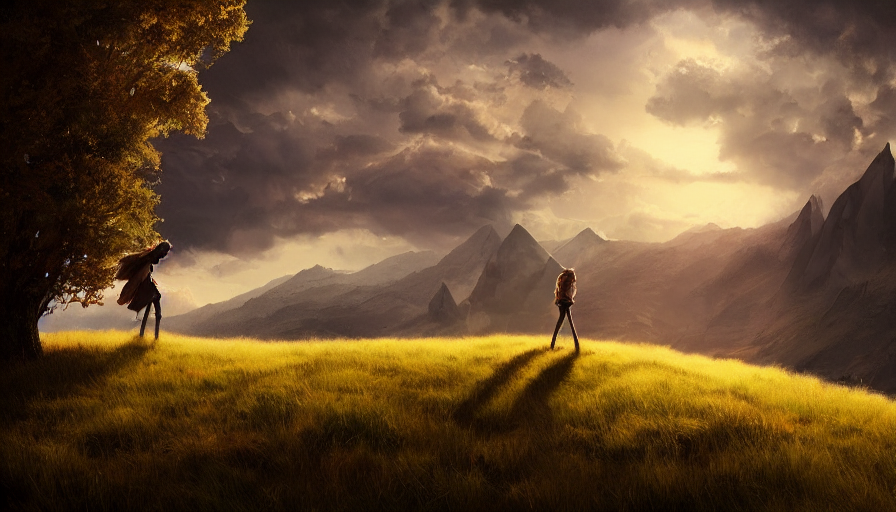

In [15]:
ds_train = dataset['train']
idx = 59
print(ds_train['prompt'][idx])
display(ds_train['image'][idx])

# Method2 - Donwload parts

In [5]:
from urllib.request import urlretrieve
from json import load
from PIL import Image
from os.path import join

import numpy as np
import shutil

In [23]:
table_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/metadata.parquet'
urlretrieve(table_url, 'metadata.parquet')

df_metadata = pl.read_parquet('metadata.parquet')
df_metadata.shape

(2000000, 13)

In [27]:
df_metadata.filter(
    ((pl.col('width') >= 512) & (pl.col('height') >= 512)) & 
    (pl.col('cfg') >= 7) & 
    ((pl.col('image_nsfw') <= 1) & (pl.col('prompt_nsfw') <= 1))
).unique('prompt').sample(1_000_000)

image_name,prompt,part_id,seed,step,cfg,sampler,width,height,user_name,timestamp,image_nsfw,prompt_nsfw
str,str,u16,u32,u16,f32,u8,u16,u16,str,"datetime[μs, UTC]",f32,f32
"""65b3d2ba-afc9-4a25-9f87-7f89ea0b28c8.png""","""futuristic provencher bridge in winnipeg manitoba, victor einrich, gregory crewdson, ian mcque, liam wong, simon stalenhag, """,1610,3424360464,150,7.0,8,512,512,"""ed5186dd7e15eb85c83f1ecc02f34ca7a5e1aaebad2ad4d5ab954caffe75e195""",2022-08-13 19:58:00 UTC,0.131772,0.000616
"""e2940bd5-1a6c-4b1e-88d6-a846913c696e.png""","""blurry vintage analog portrait of a beautiful young woman, high contrast, depth of field, bokeh, film grain""",1376,2658904319,50,7.0,8,512,512,"""20780f1d3f9a2747b77a3d8e51fff6ffb25fb62b12ac4d9ea088c57690144817""",2022-08-07 20:14:00 UTC,0.075893,0.003006
"""67f08452-3edd-4592-a0f1-f265f22371c7.png""","""“the impossibility of lemons by Simon Stalenhag, trending on artstation, 8k, octane rendered, highly detailed”""",992,3308408546,50,7.0,8,512,512,"""e98772eab14318976cedf1dbd2bf157a4fbeadfa44a1ad3dae6cb3f40d840df1""",2022-08-07 13:25:00 UTC,0.050571,0.000325
"""ca42eb64-3cd9-4fea-bb97-0c2d0e3abebc.png""","""jesus child playing uno with devil child, cute art work """,882,3600843848,50,7.0,8,512,512,"""83c9cdfc00a6099412905e9ccd8868b1bbaa562e314499cc35ea9059c4ce34c0""",2022-08-12 19:22:00 UTC,0.10666,0.195822
"""5b75abb5-a689-4b1d-bd52-79e4ac255c9c.png""","""highly detailed portrait of riz ahmed as an android covered in blood, in detroit : become human, stephen bliss, unreal engine, fantasy art by greg rutkowski, loish, rhads, ferdinand knab, makoto shink…",79,17934526,80,10.0,8,640,512,"""1e2d6243fa4f3e1c76714e082f1ec2efe074c9a4a39d4efafd3c4ff1b3a39a2a""",2022-08-11 08:24:00 UTC,0.031668,0.000354
…,…,…,…,…,…,…,…,…,…,…,…,…
"""5e3b1fa2-d47e-4a12-8232-8cec7ea63a48.png""","""a burning factory in the middle of a sandy desert. artstation. high-quality.""",389,1535379834,50,7.0,8,512,512,"""24471803c784b964e4b7253dc9ad0d7a8116d10a080897f53bcb59b1fb64ceb1""",2022-08-10 21:56:00 UTC,0.077974,0.002195
"""50613fb5-8420-4905-a57d-c0618a6d20a1.png""","""baby oil factory, detailed, industrial, realistic """,1745,1504814856,50,7.0,8,512,512,"""de57067d004b5ce3c360feb11f3bc1d7c2085f881e15dd44ef1436b78f84b81c""",2022-08-19 20:52:00 UTC,0.157805,0.0051
"""1ddccaaf-07bd-4648-89ae-2de11477fc7b.png""","""symmetry!! portrait of a pretty young united states president, 1 9 0 2, 2 0 th century, patriotic, elegant, highly detailed, digital painting, 8 k, concept art, smooth, sharp focus, illustration, ethe…",16,723305162,150,14.0,4,512,704,"""9e940550462245c21e228a9c8590a5100103c7c3c787b35dfe422fded035e466""",2022-08-15 15:13:00 UTC,0.035355,0.001664


In [28]:
part_id = 1
part_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/images/part-{part_id:06}.zip'
urlretrieve(part_url, f'part-{part_id:06}.zip')

('part-000001.zip', <http.client.HTTPMessage at 0x7ed2c9909880>)

In [29]:
shutil.unpack_archive(f'part-{part_id:06}.zip', f'part-{part_id:06}')

{'p': 'book cover illustration, art by gerald brom, of a flying medieval fantasy dragon breathing fire upon a stone brick castle, oil painting, cinematic, ultradetailed, comfy, dreamlike, ethereal, high readability ', 'se': 3601922926, 'c': 14.5, 'st': 50, 'sa': 'k_lms'}


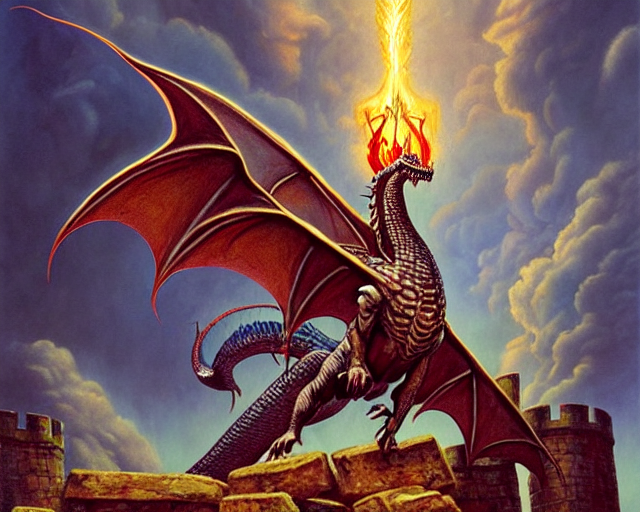

In [21]:
# Access the images and their prompts and hyperparameters
part_data = load(open(f'part-{part_id:06}/part-{part_id:06}.json', 'r', encoding='utf8'))

# Load the image
random_img_name = np.random.choice(list(part_data.keys()), 1)[0]
img = Image.open(join(f'part-{part_id:06}', random_img_name))

# Display the image with its prompt and hyperparameters
print(part_data[random_img_name])
display(img)